In [58]:
# Can we identify faulty or suboptimally performing equipment?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [28]:
plant1_gen = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_1_Generation_Data.csv')
plant1_gen.drop('PLANT_ID',1,inplace=True)
plant1_w= pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_1_Weather_Sensor_Data.csv')
plant1_w.drop('PLANT_ID',1,inplace=True)
#format datetime
plant1_gen['DATE_TIME']= pd.to_datetime(plant1_gen['DATE_TIME'],format='%d-%m-%Y %H:%M')
plant1_w['DATE_TIME']= pd.to_datetime(plant1_w['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [29]:
plant2_gen = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_2_Generation_Data.csv')
plant2_gen.drop('PLANT_ID',1,inplace=True)
plant2_w= pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_2_Weather_Sensor_Data.csv')
plant2_w.drop('PLANT_ID',1,inplace=True)
#format datetime
plant2_gen['DATE_TIME']= pd.to_datetime(plant1_gen['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
plant2_w['DATE_TIME']= pd.to_datetime(plant1_w['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

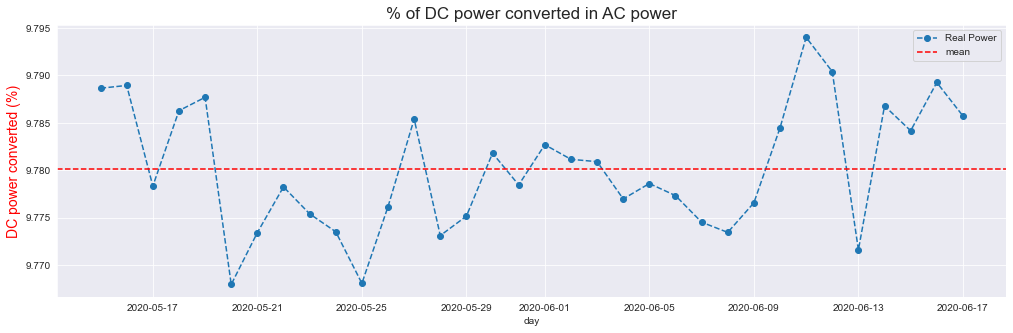

In [30]:
# dc power converted for plant1
losses=plant1_gen.copy()
losses['day']=losses['DATE_TIME'].dt.date
losses=losses.groupby('day').sum()
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='red',label='mean')
plt.legend()
plt.show()

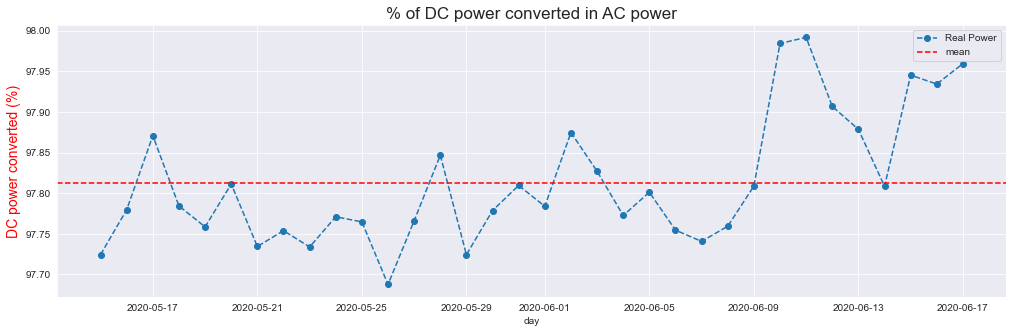

In [31]:
# dc power converted for plant1
losses=plant2_gen.copy()
losses['day']=losses['DATE_TIME'].dt.date
losses=losses.groupby('day').sum()
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='red',label='mean')
plt.legend()
plt.show()

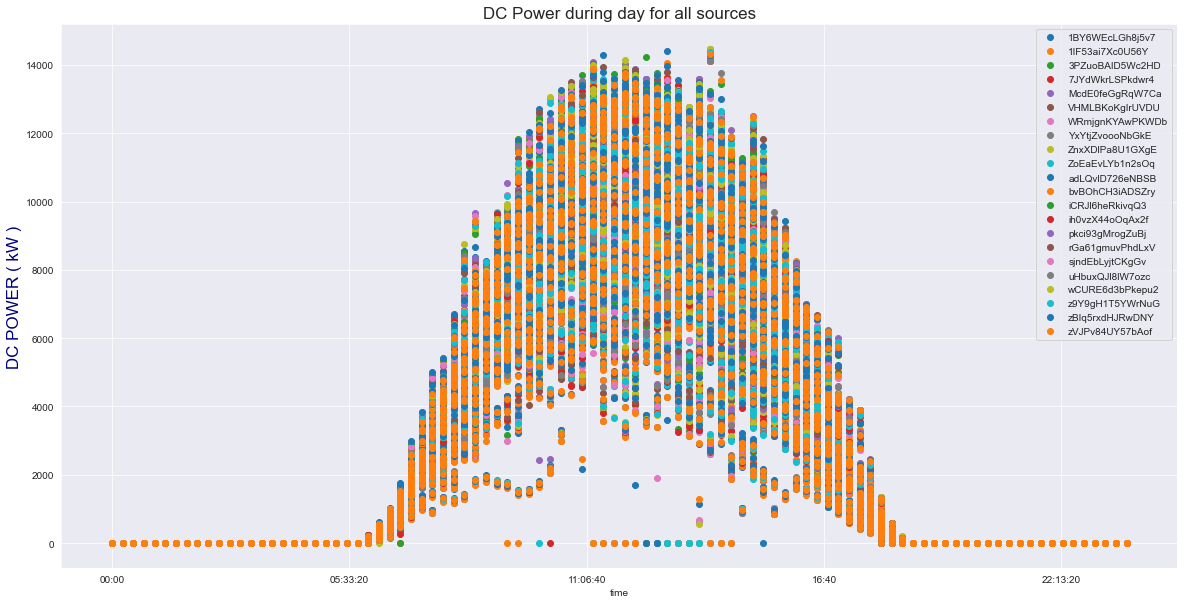

In [32]:
# dc power generated during days time for plant1
sources=plant1_gen.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power during day for all sources',size=17)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=17)
plt.show()

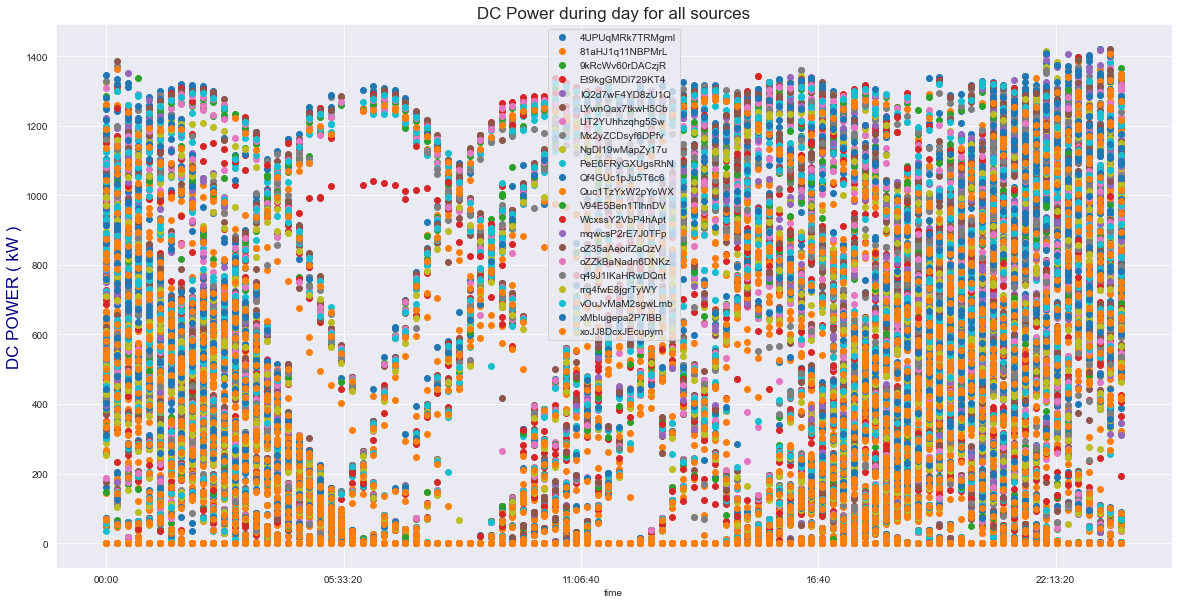

In [33]:
# dc power generated during days time for plant1
sources=plant2_gen.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power during day for all sources',size=17)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=17)
plt.show()

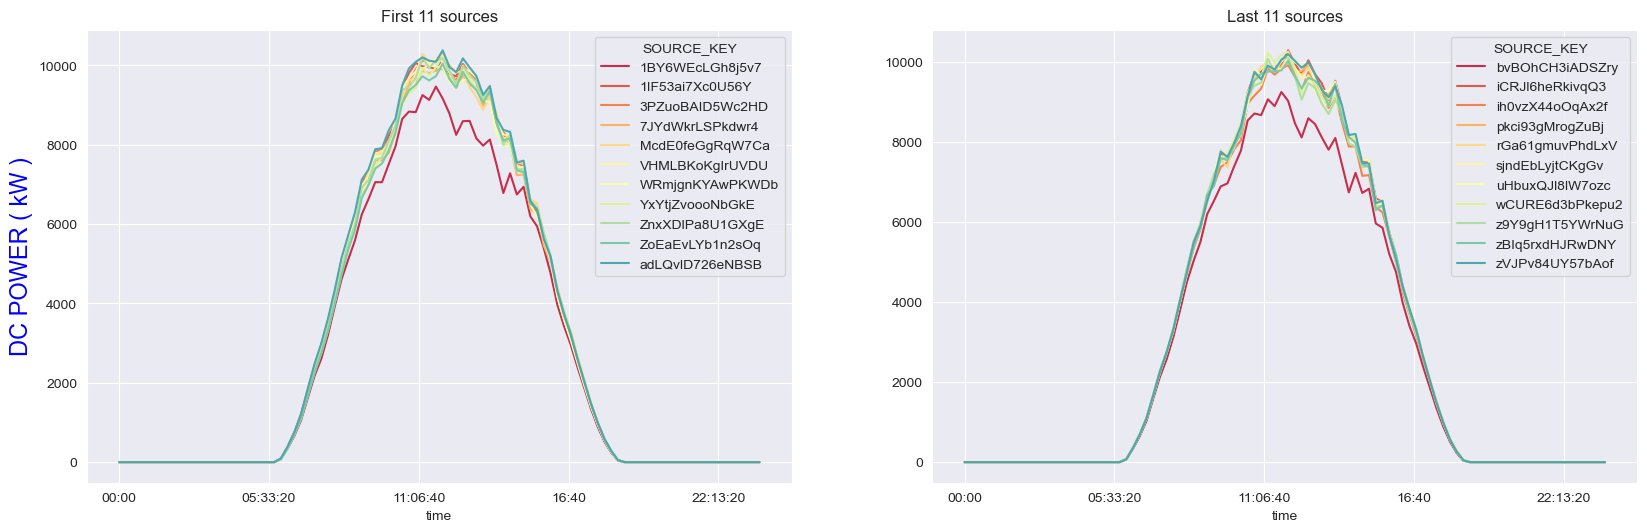

In [36]:
# which inverter is underperforming for plant1
plant1_gtemp = plant1_gen.copy()
plant1_gtemp['time']=plant1_gtemp['DATE_TIME'].dt.time
plant1_gtemp=plant1_gtemp.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
plant1_gtemp.iloc[:,0:11].plot(ax=ax[0],color=cmap)
plant1_gtemp.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='blue')
ax[1].set_title('Last 11 sources')
plt.show()

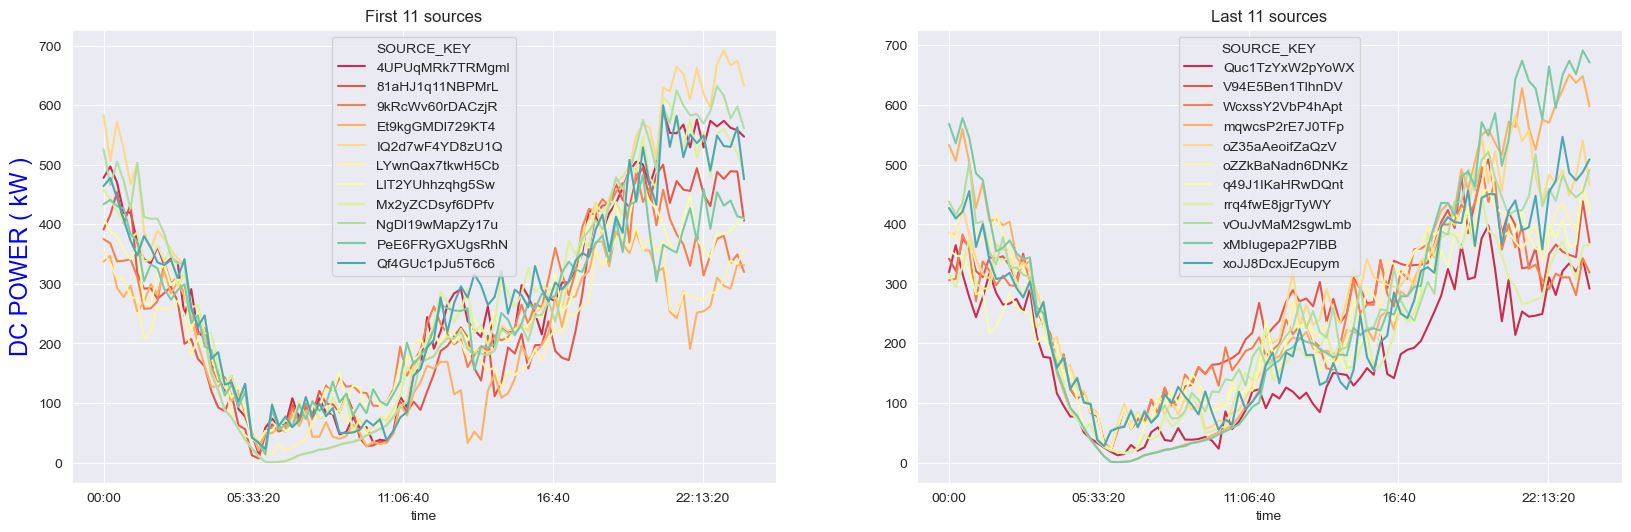

In [37]:
# which inverter is underperforming for plant2
plant2_gtemp=plant2_gen.copy()
plant2_gtemp['time']=plant2_gtemp['DATE_TIME'].dt.time
plant2_gtemp=plant2_gtemp.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
plant2_gtemp.iloc[:,0:11].plot(ax=ax[0],color=cmap)
plant2_gtemp.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='blue')
ax[1].set_title('Last 11 sources')
plt.show()

In [48]:
gentemp1=plant1_gen.copy()

gentemp1['time']=gentemp1['DATE_TIME'].dt.time
gentemp1['day']=gentemp1['DATE_TIME'].dt.date


wtemp1=plant1_w.copy()

wtemp1['time']=wtemp1['DATE_TIME'].dt.time
wtemp1['day']=wtemp1['DATE_TIME'].dt.date

# just for columns
cols=gentemp1.groupby(['time','day'])['DC_POWER'].mean().unstack()

In [49]:
gentemp2=plant2_gen.copy()

gentemp2['time']=gentemp2['DATE_TIME'].dt.time
gentemp2['day']=gentemp2['DATE_TIME'].dt.date


wtemp2=plant2_w.copy()

wtemp2['time']=wtemp2['DATE_TIME'].dt.time
wtemp2['day']=wtemp2['DATE_TIME'].dt.date

# just for columns
cols=gentemp2.groupby(['time','day'])['DC_POWER'].mean().unstack()

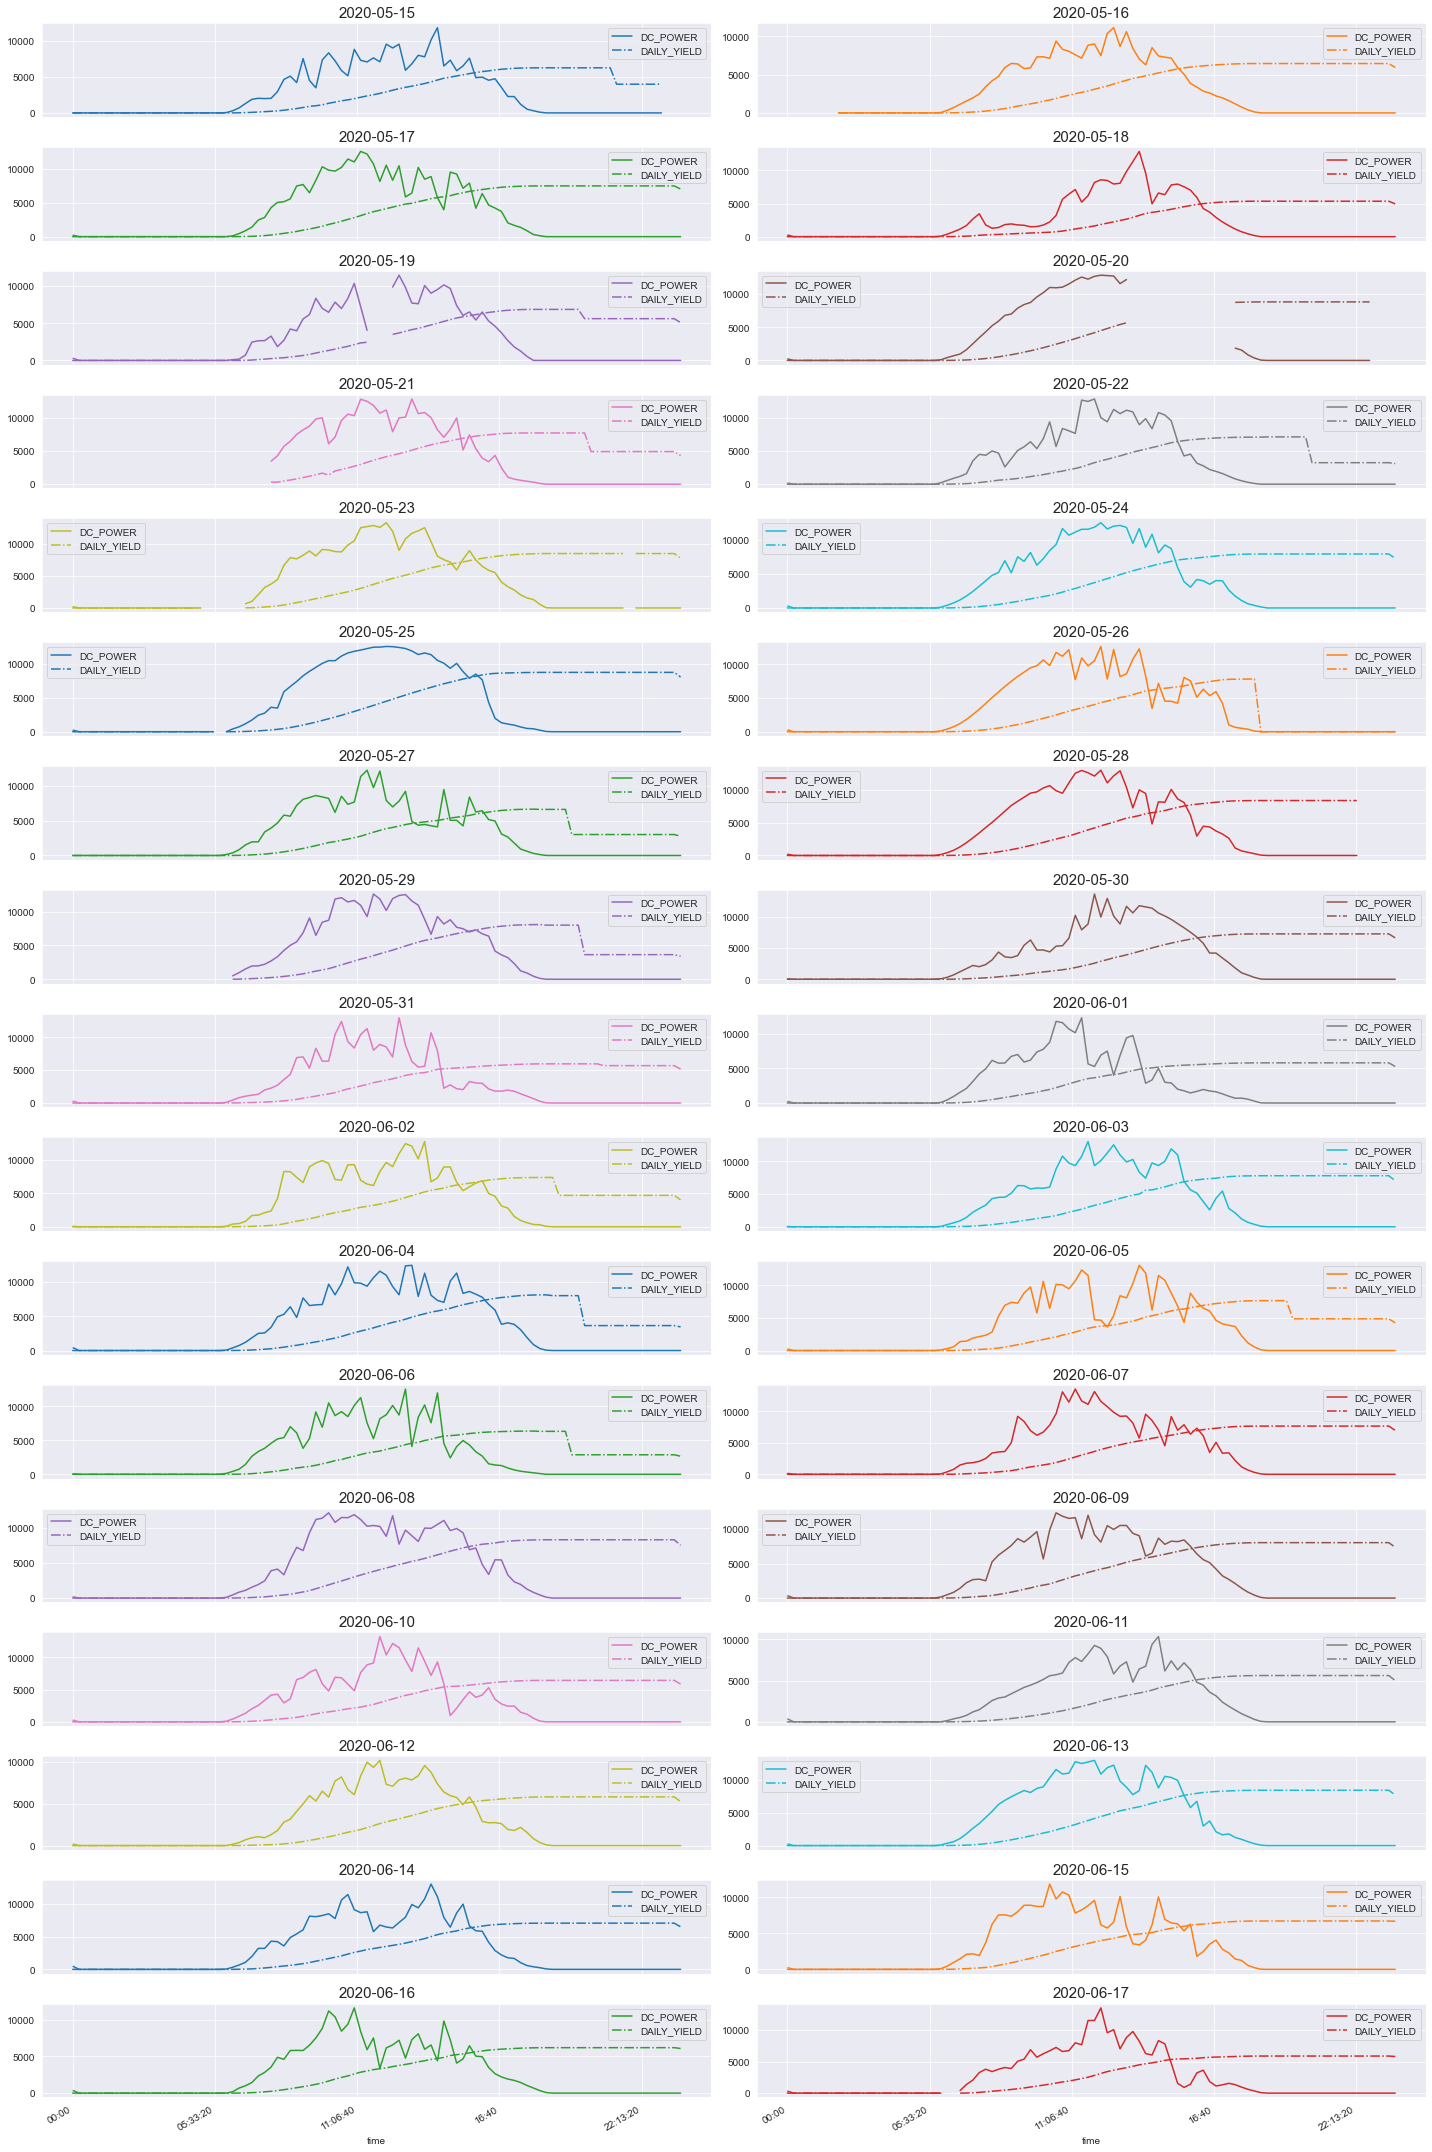

In [50]:
# dc power X daily yield for plant1
ax =gentemp1.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
gentemp1.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

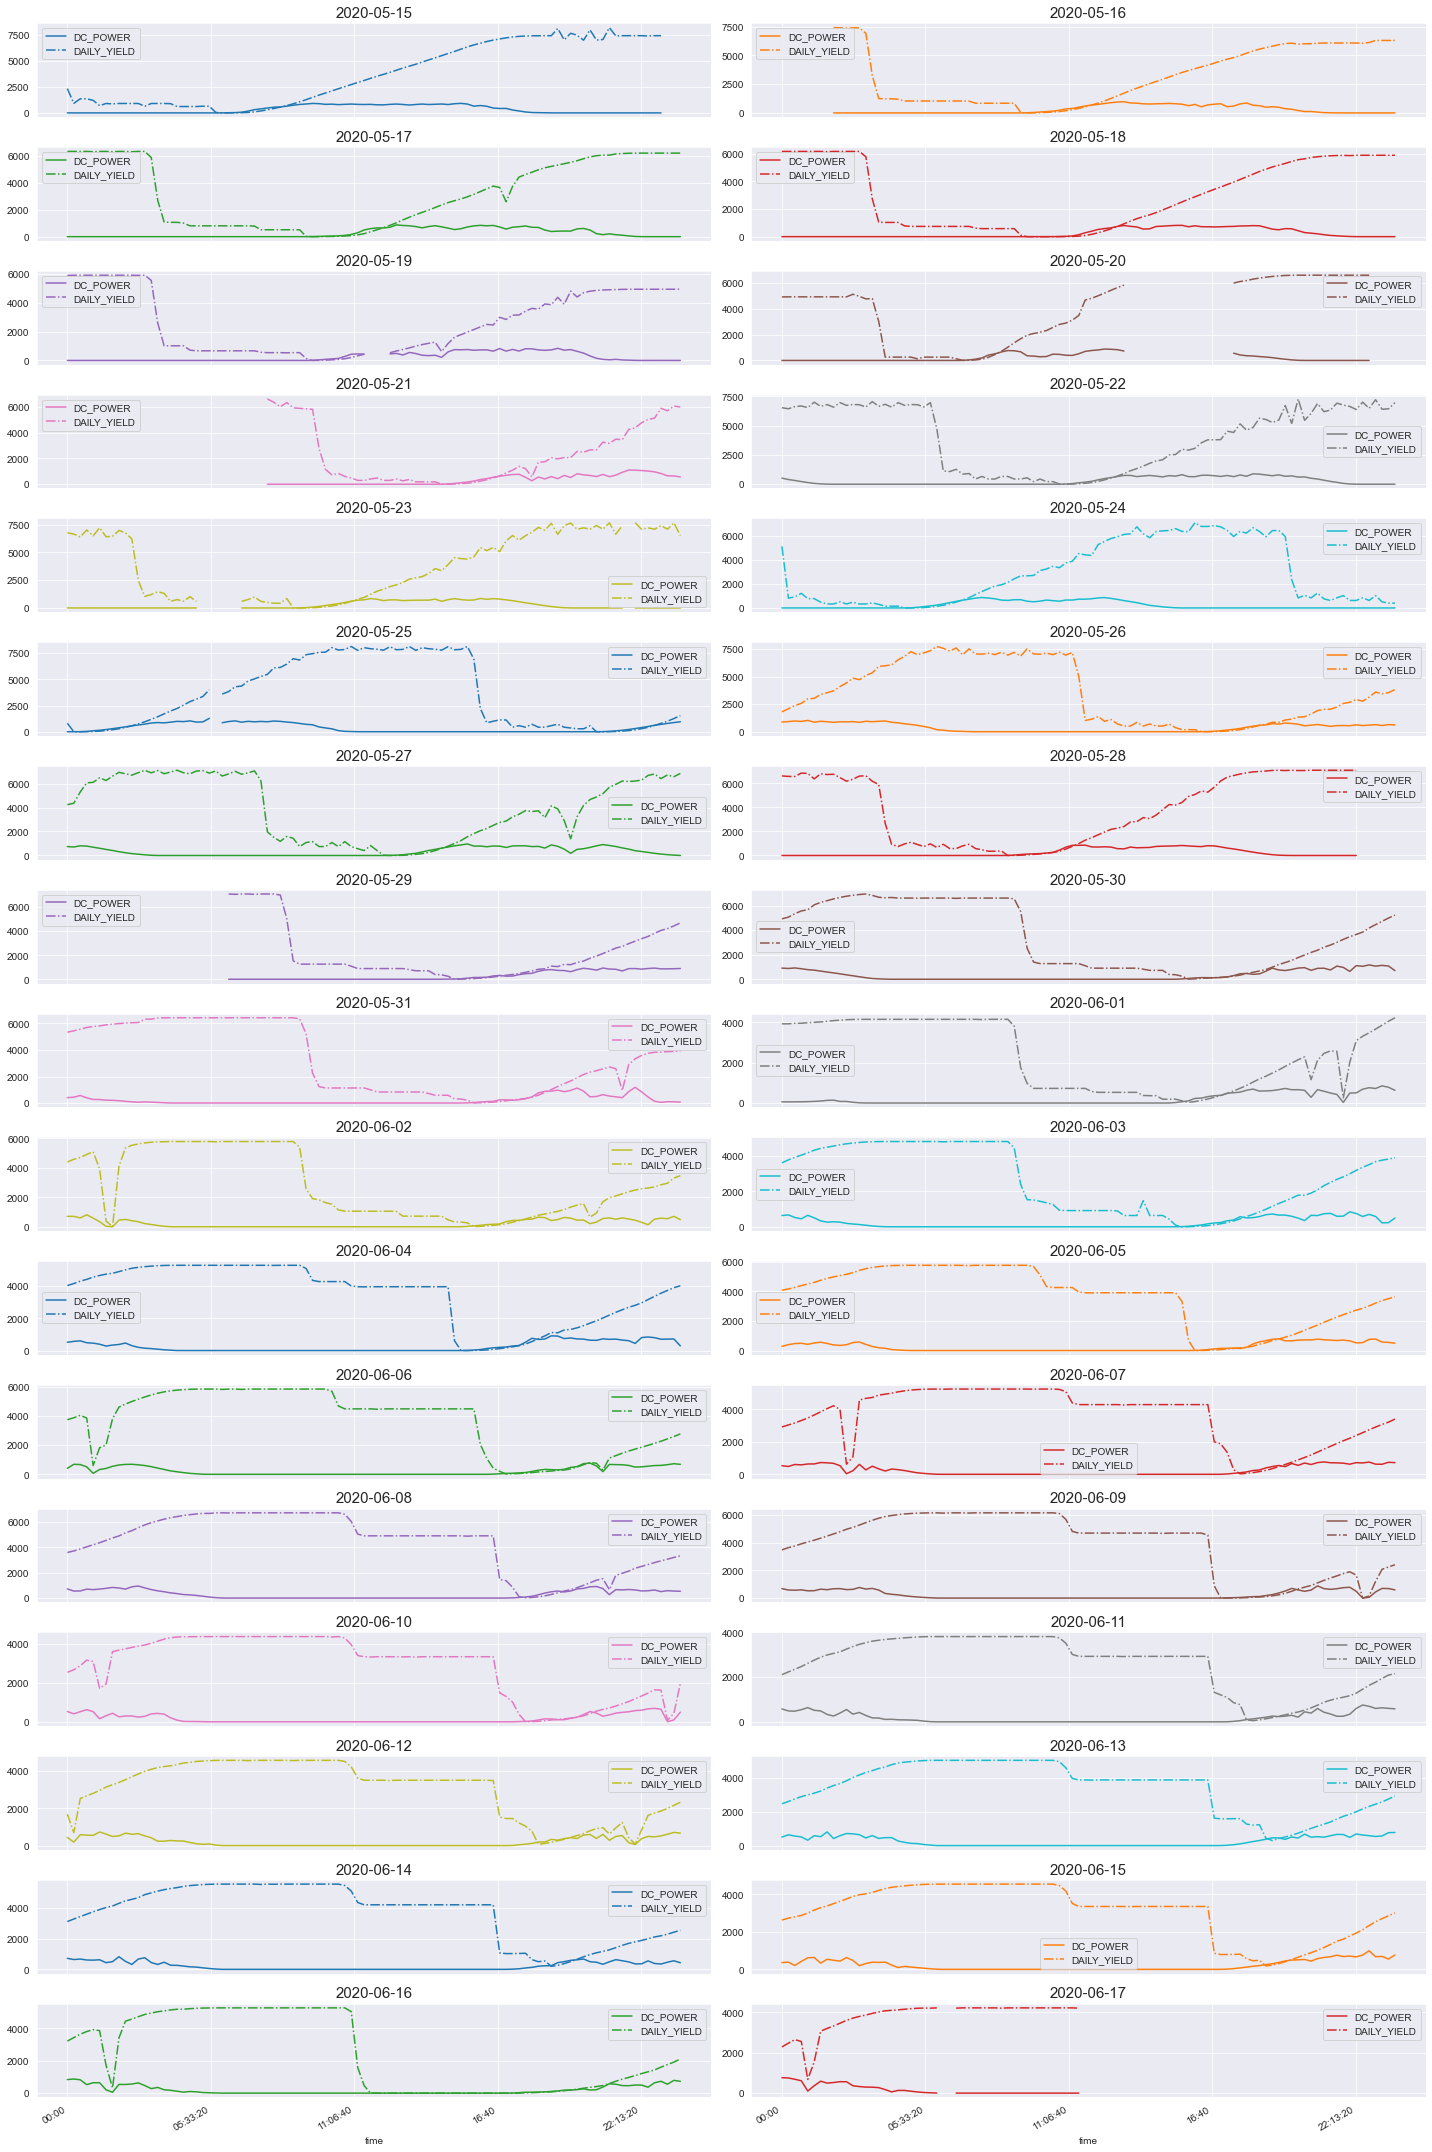

In [51]:
# dc power X daily yield for plant1
ax =gentemp2.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
gentemp2.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

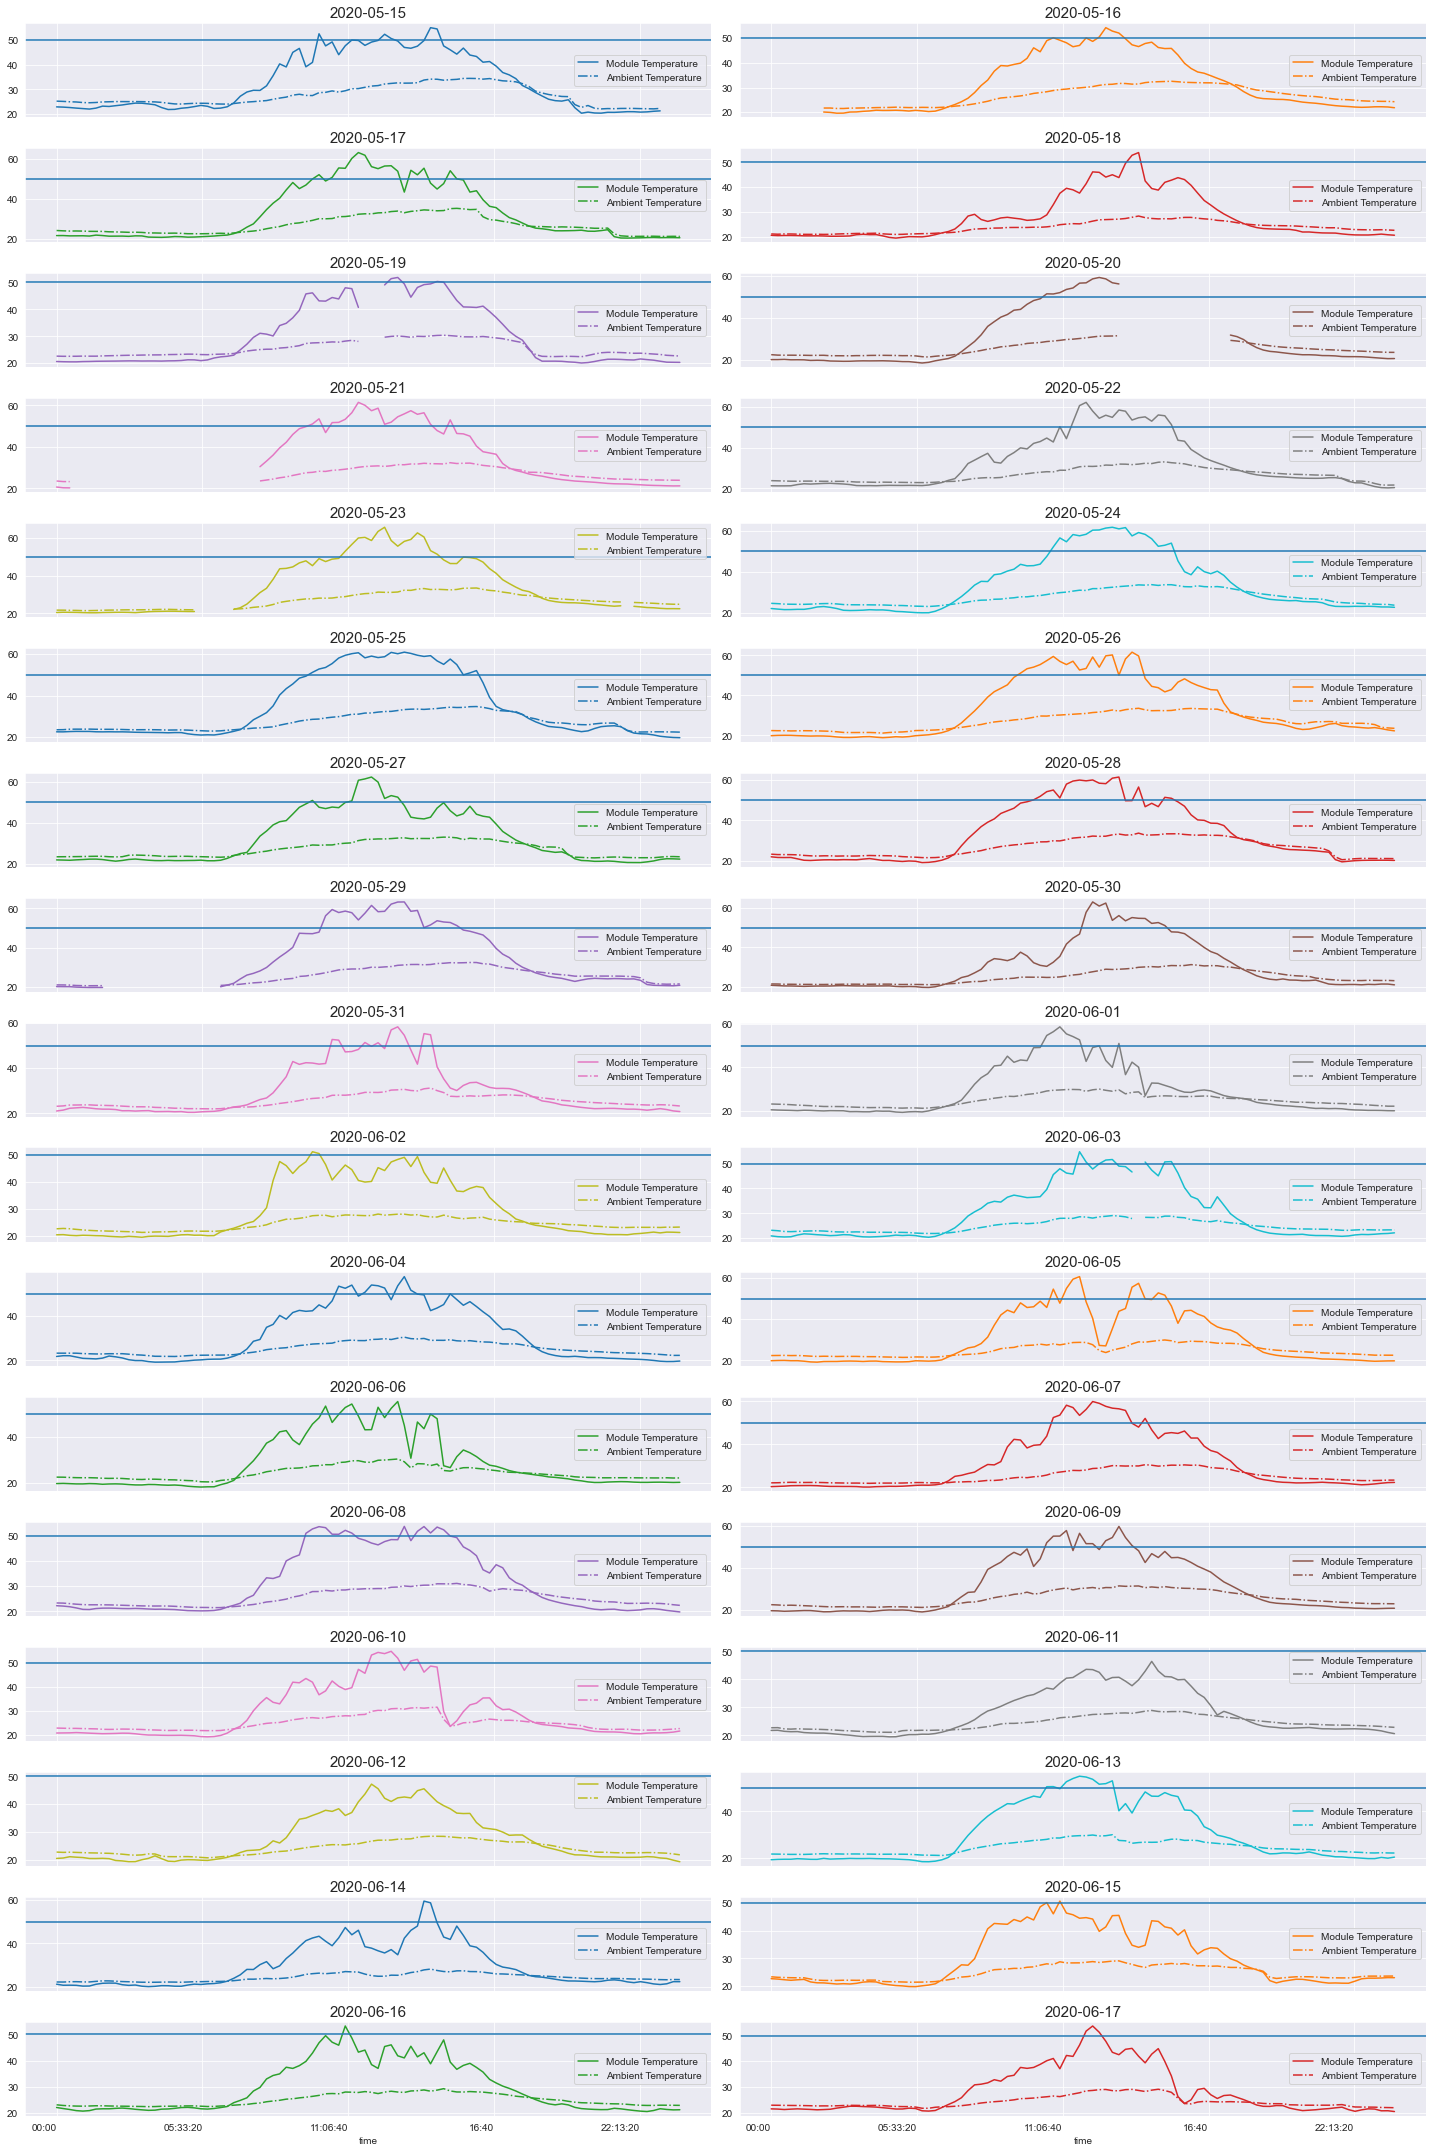

In [52]:
# module temp X ambient temp for plant1
ax= wtemp1.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
wtemp1.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

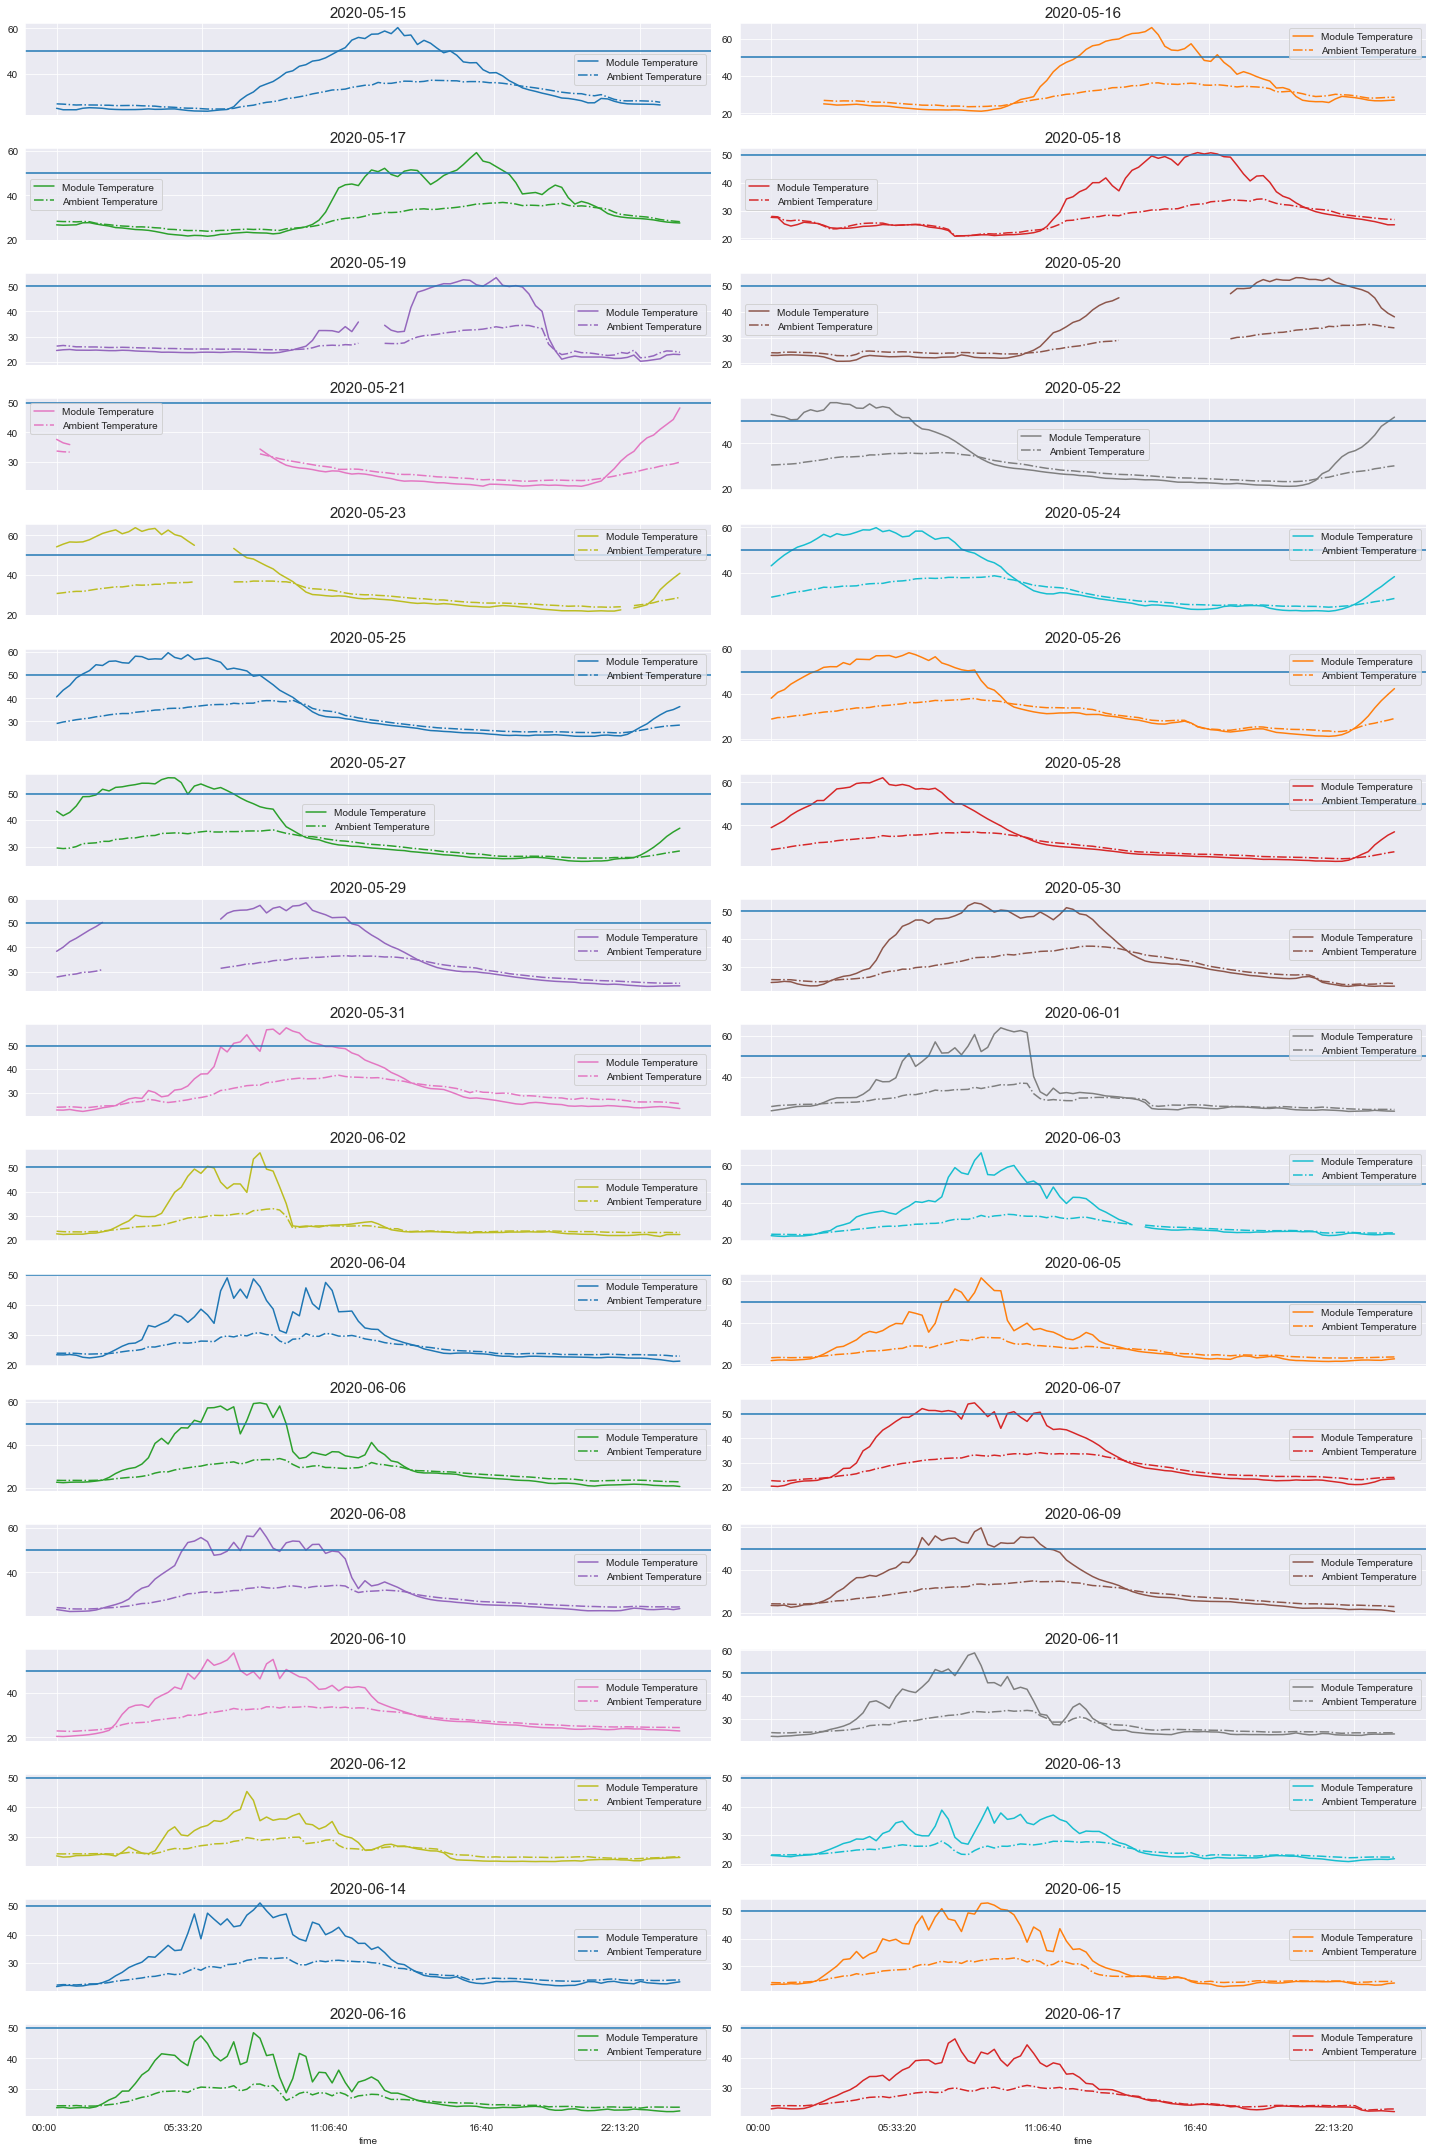

In [53]:
# module temp X ambient temp for plant2
ax= wtemp2.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
wtemp2.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

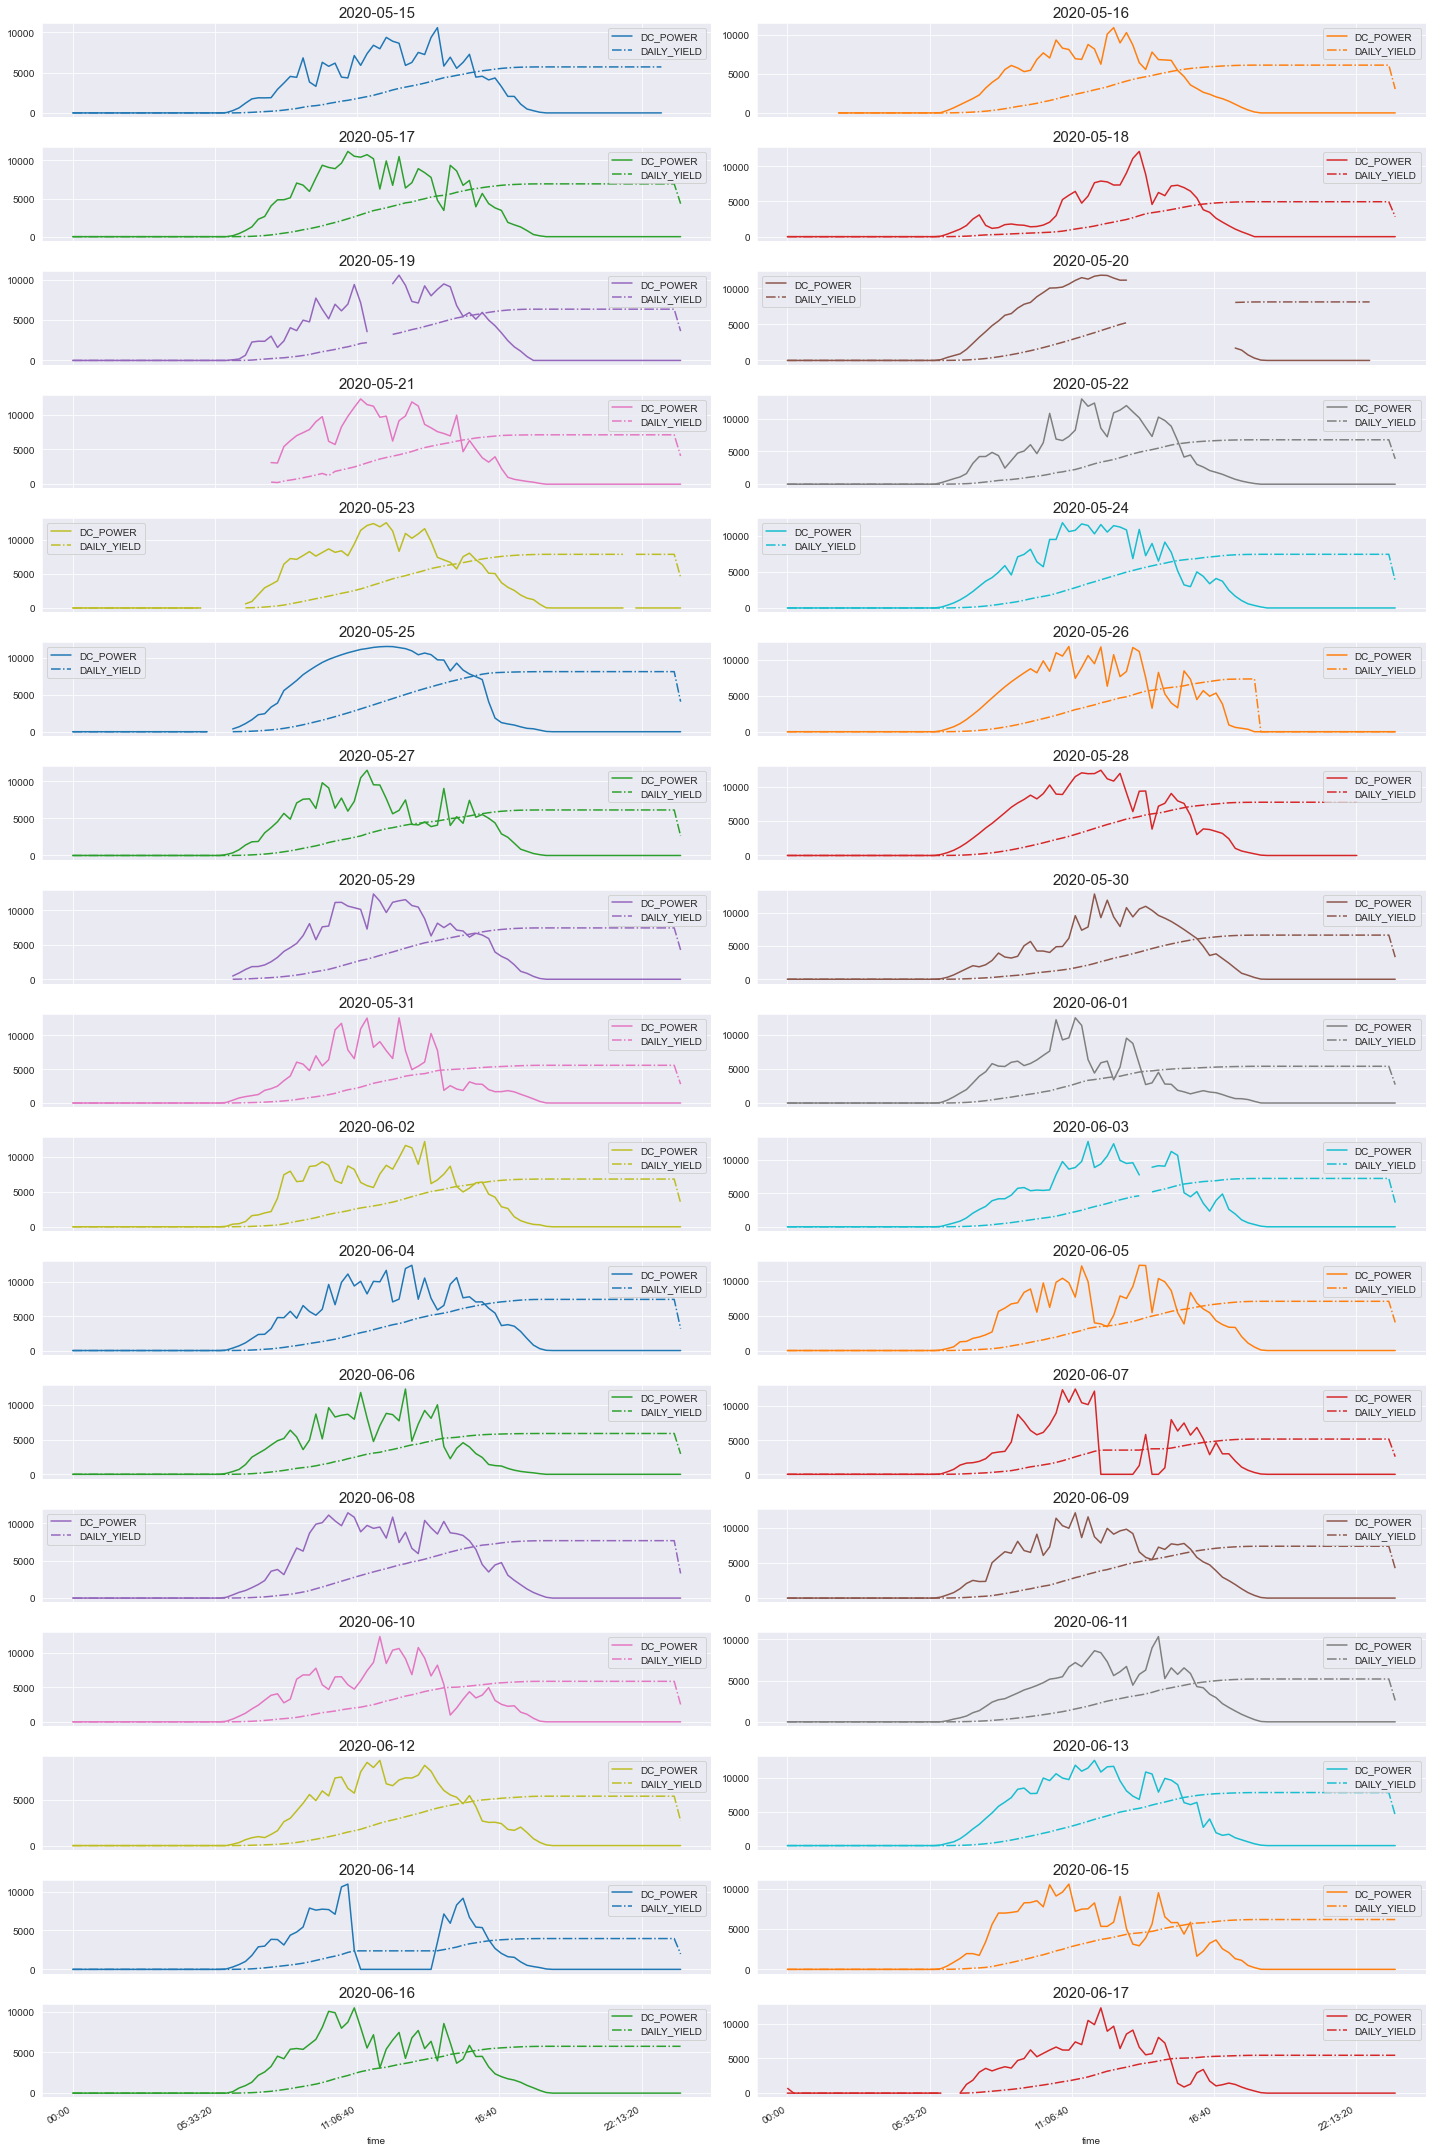

In [55]:
# inverter bvBOhCH3iADSZry for plant 1
worst_source=plant1_gen[plant1_gen['SOURCE_KEY']=='bvBOhCH3iADSZry']
worst_source['time']=worst_source['DATE_TIME'].dt.time
worst_source['day']=worst_source['DATE_TIME'].dt.date

ax=worst_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
worst_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=ax,style='-.')

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

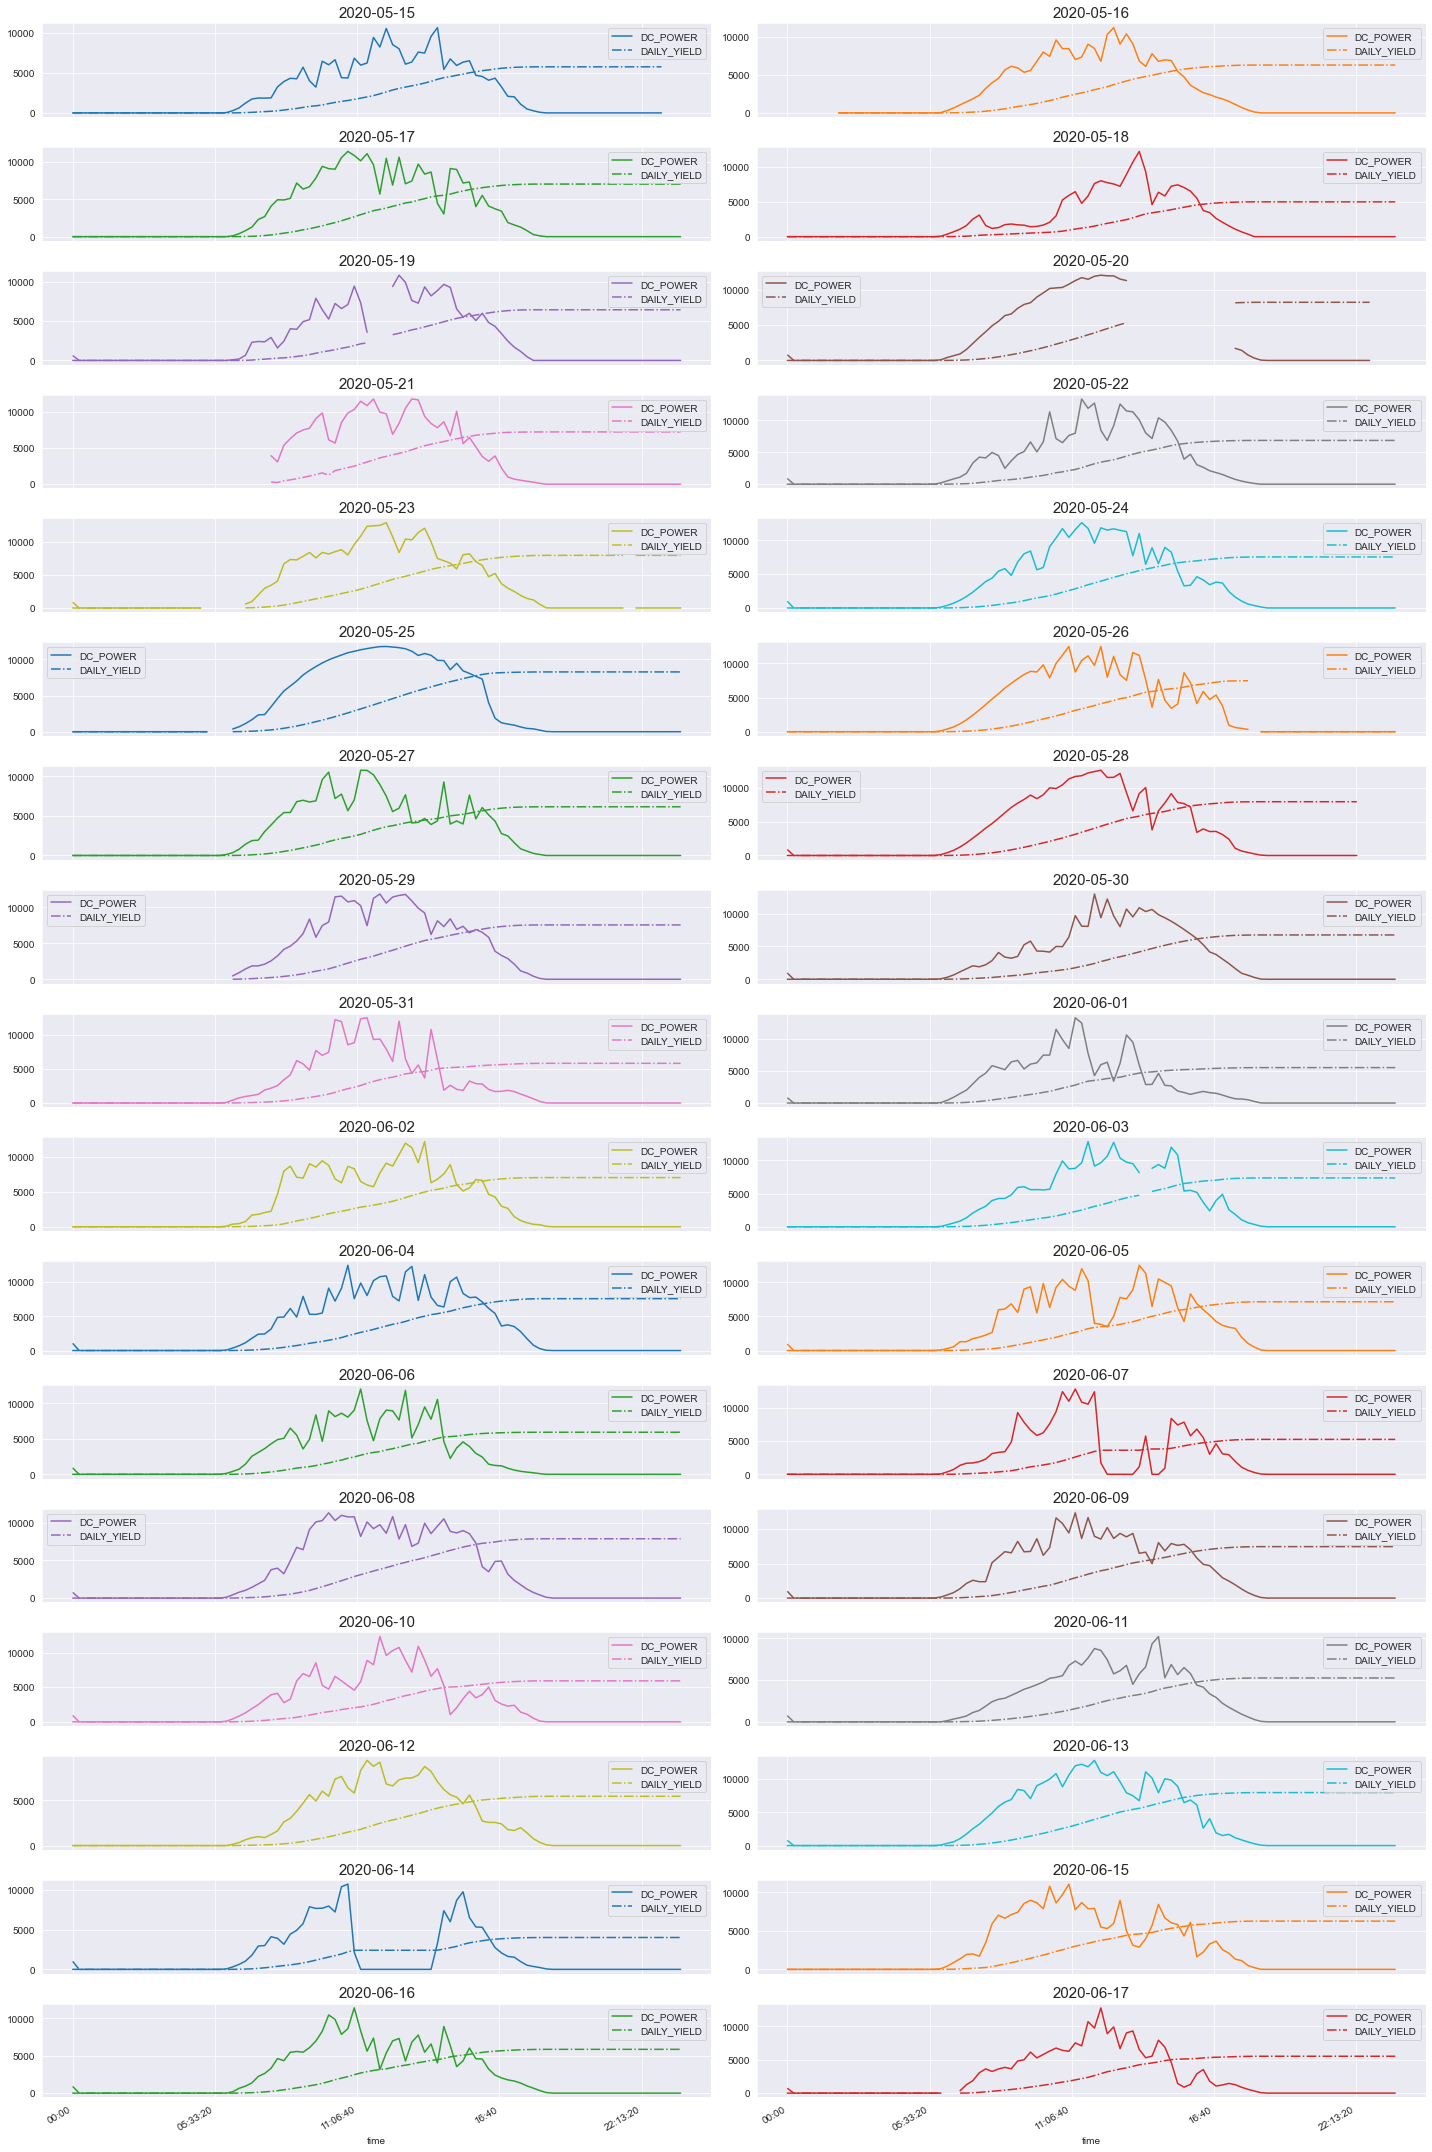

In [56]:
# inverter 1BY6WEcLGh8j5v7 for plant1
worst_source=plant1_gen[plant1_gen['SOURCE_KEY']=='1BY6WEcLGh8j5v7']
worst_source['time']=worst_source['DATE_TIME'].dt.time
worst_source['day']=worst_source['DATE_TIME'].dt.date

ax=worst_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
worst_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=ax,style='-.')

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

In [57]:
# Can we predict the power generation for the next couple of days? - this allows for better grid management
from pandas.tseries.offsets import DateOffset
! pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [24]:
pred_gen=gen_1.copy()
pred_gen=pred_gen.groupby('DATE_TIME').sum()
pred_gen=pred_gen['DAILY_YIELD'][-288:].reset_index()
pred_gen.set_index('DATE_TIME',inplace=True)
pred_gen.head()

DAILY_YIELD
DATE_TIME                         
2020-06-14 23:30:00  155054.000000
2020-06-14 23:45:00  142682.392857
2020-06-15 00:00:00    5480.000000
2020-06-15 00:15:00       0.000000
2020-06-15 00:30:00       0.000000

In [59]:
genpredict=plant2_gen.copy()
genpredict=genpredict.groupby('DATE_TIME').sum()
genpredict=genpredict['DAILY_YIELD'][-288:].reset_index()
genpredict.set_index('DATE_TIME',inplace=True)
genpredict.head()

DAILY_YIELD
DATE_TIME                       
2020-06-14 11:15:00      95945.6
2020-06-14 11:30:00      92668.0
2020-06-14 11:45:00      92668.0
2020-06-14 12:00:00      92668.0
2020-06-14 12:15:00      92668.0

In [63]:
result = adfuller(genpredict['DAILY_YIELD'])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("reject the null hypothesis.")
else:
    print("weak evidence against null hypothesis")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.186223669787986
p-value : 0.21128340966561626
#Lags Used : 2
Number of Observations Used : 285
weak evidence against null hypothesis


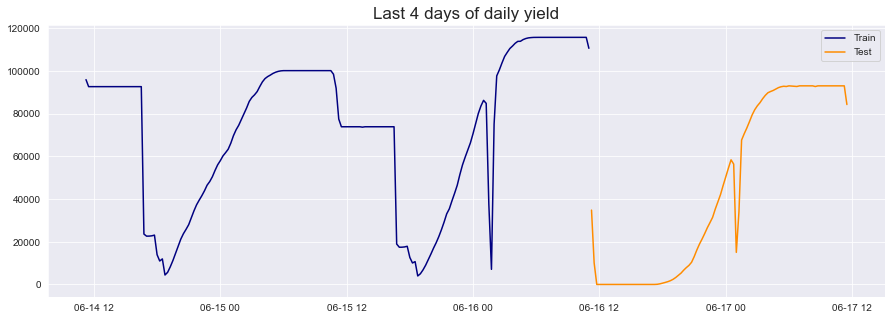

In [64]:
# splitting into tain and test datasets to build model on the training
# dataset and forecast using the test dataset
train=genpredict[:192]
test=genpredict[-96:]
plt.figure(figsize=(15,5))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of daily yield',fontsize=17)
plt.legend()
plt.show()

In [65]:
arima_model = auto_arima(train,
                         start_p=0,d=1,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=2012.427, Time=1.28 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=2012.319, Time=5.19 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=2011.643, Time=6.74 sec
 ARIMA(0,1,1)(0,1,0)[96]             : AIC=2012.322, Time=0.56 sec
 ARIMA(0,1,1)(1,1,1)[96]             : AIC=2013.625, Time=12.77 sec
 ARIMA(0,1,1)(1,1,0)[96]             : AIC=2011.625, Time=6.27 sec
 ARIMA(0,1,0)(1,1,0)[96]             : AIC=2011.288, Time=4.01 sec
 ARIMA(0,1,0)(1,1,1)[96]             : AIC=2013.273, Time=7.53 sec
 ARIMA(0,1,0)(0,1,1)[96]             : AIC=2011.275, Time=6.50 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=2012.325, Time=6.42 sec
 ARIMA(1,1,1)(0,1,1)[96]             : AIC=2010.352, Time=11.58 sec
 ARIMA(1,1,1)(0,1,0)[96]             : AIC=2011.688, Time=1.39 sec
 ARIMA(1,1,1)(1,1,1)[96]             : AIC=2012.316, Time=18.53 sec
 ARIMA(1,1,1)(1,1,0)[96]             : AIC=2010.317, Time=11.49 sec
 ARIMA(2,1,1)(1

In [66]:
future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range(0,2910,15) ]

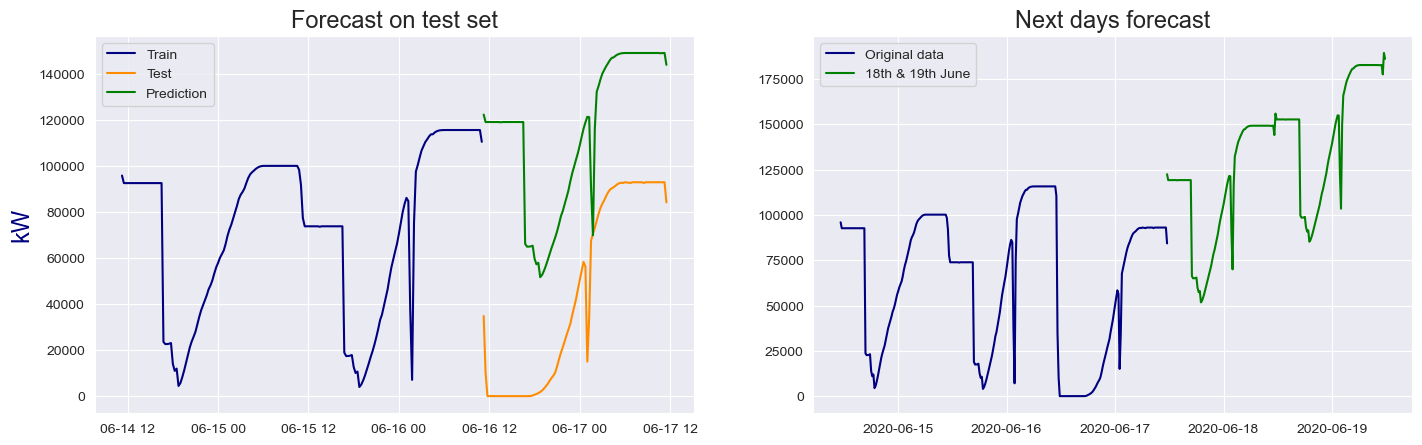

In [67]:
prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
ax[0].plot(train,label='Train',color='navy')
ax[0].plot(test,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set',size=17)
ax[0].set_ylabel('kW',color='blue',fontsize=17)


f_prediction=pd.DataFrame(arima_model.predict(n_periods=194),index=future_dates)
f_prediction.columns=['predicted_yield']
ax[1].plot(genpredict,label='Original data',color='navy')
ax[1].plot(f_prediction,label='18th & 19th June',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast',size=17)
plt.show()